In [39]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Comparision of DNN & CNN with Cirfar10

In [40]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train[0], train[1]
x_test, y_test = test[0], test[1]

In [41]:
## Preprocessing_data
def nomarlization(x, value=255.):
    return x/value

def preprocessing(x):
    data_size = x.shape[0]
    x_1 = x/255.
    return x_1.reshape((data_size, -1))

def label_OHE(y, num_class=10):
    return keras.utils.to_categorical(y, num_class)
print('Before')
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train_dnn = preprocessing(x_train)
x_test_dnn = preprocessing(x_test)
y_train_dnn = label_OHE(y_train)
y_test_dnn = label_OHE(y_test)
#
x_train = nomarlization(x_train)
x_test = nomarlization(x_test)

print('After Preprocessing')
print('x_train:', x_train_dnn.shape)
print('x_test:', x_test_dnn.shape)
print('y_train:', y_train_dnn.shape)
print('y_test:', y_test_dnn.shape)

Before
x_train: (50000, 32, 32, 3)
x_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)
After Preprocessing
x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)


## Hypyer Parameters

In [49]:
EPOCHS = 100
BATCH_SIZE = 20
LEARNINGRATE = 1e-3
OPTIMIZER = keras.optimizers.adam(lr=LEARNINGRATE)

In [50]:
hidden_node = [512, 256, 128]
def build_dnn(input_shape= x_train_dnn.shape[-1:], output_shape= 10, hidden_layer = hidden_node):
    keras.backend.clear_session()
    input_layer = keras.layers.Input(input_shape)
    for idx, h in enumerate(hidden_layer):
        if idx == 0:
            x = keras.layers.Dense(h, activation='relu')(input_layer)
            x = keras.layers.BatchNormalization()(x)
        else:
            x = keras.layers.Dense(h, activation='relu')(x)
            x = keras.layers.BatchNormalization()(x)
    output_layer = keras.layers.Dense(output_shape, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

dnn_model = build_dnn()
dnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

In [51]:
OPTIMIZER = keras.optimizers.adam(lr=LEARNINGRATE)
CALLBACK = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, verbose=1),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
            keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='cirfar10_dnn.h5', save_best_only=True)
           ]
dnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=OPTIMIZER, metrics=['accuracy'])
history = dnn_model.fit(x_train_dnn, y_train_dnn,
                        epochs=EPOCHS, verbose=1,
                        batch_size=BATCH_SIZE, 
                        validation_data=(x_test_dnn, y_test_dnn),
                        callbacks=CALLBACK
                       )

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 444us/step - loss: 1.8021 - acc: 0.3589 - val_loss: 1.7715 - val_acc: 0.3755
Epoch 2/100
50000/50000 [==============================] - 21s 417us/step - loss: 1.6409 - acc: 0.4157 - val_loss: 1.6034 - val_acc: 0.4243
Epoch 3/100
50000/50000 [==============================] - 21s 426us/step - loss: 1.5552 - acc: 0.4450 - val_loss: 1.5258 - val_acc: 0.4566
Epoch 4/100
50000/50000 [==============================] - 22s 438us/step - loss: 1.5043 - acc: 0.4650 - val_loss: 1.5196 - val_acc: 0.4562
Epoch 5/100
50000/50000 [==============================] - 21s 428us/step - loss: 1.4696 - acc: 0.4772 - val_loss: 1.4701 - val_acc: 0.4771
Epoch 6/100
50000/50000 [==============================] - 21s 414us/step - loss: 1.4444 - acc: 0.4856 - val_loss: 1.5555 - val_acc: 0.4543
Epoch 7/100
50000/50000 [==============================] - 21s 422us/step - loss: 1.4175 - acc: 0.4964 - val_l

10000/10000 [==============================] - 1s 70us/step


Text(0.5, 0, 'Epochs')

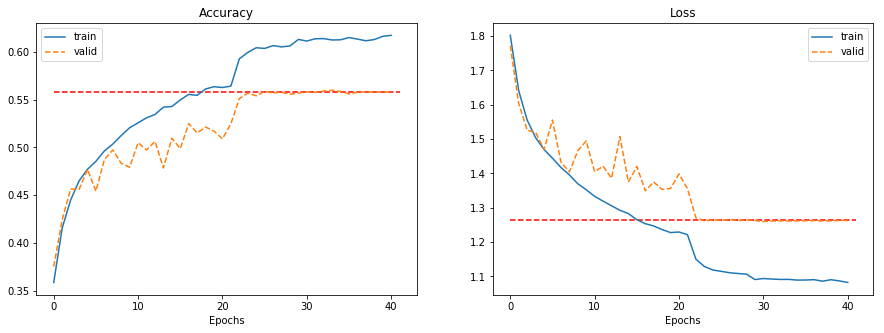

In [52]:
score_dnn = dnn_model.evaluate(x_test_dnn, y_test_dnn)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hlines(score_dnn[1], 0, len(history.history['acc']), color='r', linestyle='--')
ax1.plot(range(len(history.history['acc'])), history.history['acc'], label='train')
ax1.plot(range(len(history.history['val_acc'])), history.history['val_acc'], linestyle='--', label='valid')
ax1.legend()
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax2.hlines(score_dnn[0], 0, len(history.history['acc']), color='r', linestyle='--')
ax2.plot(range(len(history.history['loss'])), history.history['loss'], label='train')
ax2.plot(range(len(history.history['val_loss'])), history.history['val_loss'], linestyle='--', label='valid')
ax2.legend()
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')

# CNN Model

In [53]:
feature_map = [32, 128]
def build_cnn(input_shape=x_train[0].shape, output_shape=10, feature_map = feature_map):
    keras.backend.clear_session()
    input_layer = keras.layers.Input(input_shape)
    for idx, f in enumerate(feature_map):
        if idx == 0:
            x = keras.layers.Conv2D(filters=f//2, kernel_size=(3, 3))(input_layer)
            x = keras.layers.Activation('relu')(x)
            x = keras.layers.Conv2D(filters=f, kernel_size=(3, 3))(x)
            x = keras.layers.Activation('relu')(x)
            x = keras.layers.BatchNormalization(axis=-1)(x)
            x = keras.layers.MaxPool2D((2, 2))(x)
        
        else:
            x = keras.layers.Conv2D(filters=f//2, kernel_size=(3, 3))(x)
            x = keras.layers.Activation('relu')(x)
            x = keras.layers.Conv2D(filters=f, kernel_size=(3, 3))(x)
            x = keras.layers.Activation('relu')(x)
            x = keras.layers.BatchNormalization(axis=-1)(x)
            x = keras.layers.MaxPool2D((2, 2))(x)
        
    # Dense Net
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(32)(x)
    x = keras.layers.Activation('relu')(x)
    x = keras.layers.BatchNormalization(axis=-1)(x)
    x = keras.layers.Dense(output_shape)(x)
    output_layer = keras.layers.Activation('softmax')(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

cnn_model = build_cnn()
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [54]:
OPTIMIZER = keras.optimizers.adam(lr=LEARNINGRATE)
CALLBACK = [keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.1, verbose=1),
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
            keras.callbacks.ModelCheckpoint(monitor='val_loss', filepath='cirfar10_cnn.h5', save_best_only=True)
           ]
cnn_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=OPTIMIZER, metrics=['accuracy'])
cnn_history = cnn_model.fit(x_train, y_train_dnn, 
                            epochs=EPOCHS, batch_size=BATCH_SIZE,
                            validation_data=(x_test, y_test_dnn), 
                            verbose=1, callbacks=CALLBACK
                            )

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 24s 472us/step - loss: 1.3320 - acc: 0.5269 - val_loss: 1.1364 - val_acc: 0.6064
Epoch 2/100
50000/50000 [==============================] - 22s 443us/step - loss: 0.9301 - acc: 0.6778 - val_loss: 0.9160 - val_acc: 0.6794
Epoch 3/100
50000/50000 [==============================] - 22s 438us/step - loss: 0.7868 - acc: 0.7279 - val_loss: 0.9473 - val_acc: 0.6683
Epoch 4/100
50000/50000 [==============================] - 22s 436us/step - loss: 0.6898 - acc: 0.7618 - val_loss: 0.7566 - val_acc: 0.7399
Epoch 5/100
50000/50000 [==============================] - 23s 458us/step - loss: 0.6024 - acc: 0.7928 - val_loss: 0.8664 - val_acc: 0.7045
Epoch 6/100
50000/50000 [==============================] - 23s 454us/step - loss: 0.5362 - acc: 0.8150 - val_loss: 0.8373 - val_acc: 0.7230
Epoch 7/100
50000/50000 [==============================] - 22s 441us/step - loss: 0.4807 - acc: 0.8324 - val_l

10000/10000 [==============================] - 1s 91us/step
0.8488963928222656 0.7689


Text(0.5, 0, 'Epochs')

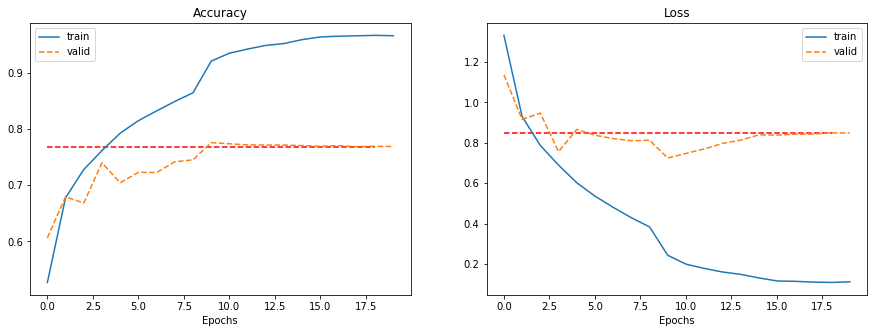

In [55]:
score = cnn_model.evaluate(x_test, y_test_dnn)
print(score[0], score[1])
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hlines(score[1], 0, 18, color='r', linestyle='--')
ax1.plot(range(len(cnn_history.history['acc'])), cnn_history.history['acc'], label='train')
ax1.plot(range(len(cnn_history.history['val_acc'])), cnn_history.history['val_acc'], linestyle='--', label='valid')
ax1.legend()
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax2.hlines(score[0], 0, 18, color='r', linestyle='--')
ax2.plot(range(len(cnn_history.history['loss'])), cnn_history.history['loss'], label='train')
ax2.plot(range(len(cnn_history.history['val_loss'])), cnn_history.history['val_loss'], linestyle='--', label='valid')
ax2.legend()
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')

## Questions:
- 1. Which hyperparameter is critical to accuracy?  
    Ans: Batch_size. smaller batch size optimized final accuracy
- 2. Which model has more parameters?  Why?  
    Ans: DNN. Cause CNN reduce parameters by convolution and pooling layer operation. 